In [6]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 5.1 MB/s eta 0:00:03
    --------------------------------------- 0.2/11.0 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.0 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.0 MB 6.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 7.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 16.0 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 32.7 MB/s eta 0:00:01



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
data = {
    'area': [1000, 1500, 2000, 2500, 3000],
    'price': [104500, 151230, 223100, 251100, 322200]
}


In [5]:
df=pd.DataFrame(data)

In [11]:
df

,area,price
0,1000,104500
1,1500,151230
2,2000,223100
3,2500,251100
4,3000,322200


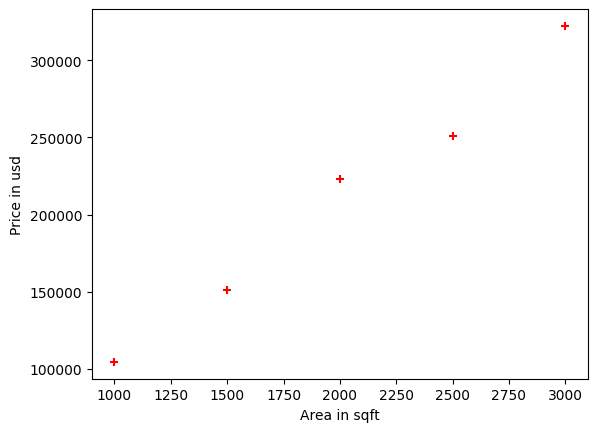

In [6]:
plt.xlabel("Area in sqft")
plt.ylabel("Price in usd")
plt.scatter(df.area,df.price,color="Red",marker="+")

In [7]:
reg=linear_model.LinearRegression()

In [8]:
reg.fit(df[['area']],df.price)

LinearRegression()

In [9]:
reg.predict([[4300]])

C:\Users\VM40User2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([456650.2])

In [10]:
reg.coef_

array([107.054])

In [11]:
reg.intercept_

-3681.999999999971

In [12]:
#y=mx+C
y=107.054*4300+-3681.999999999971

In [13]:
y

456650.20000000007

In [14]:
new_data = {
    'area': [4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]
}


df_new = pd.DataFrame(new_data)
print(df_new)

   area
0  4560
1  5490
2  3460
3  4750
4  2300
5  9000
6  8600
7  7100


In [15]:
reg.predict(df_new)

array([484484.24, 584044.46, 366724.84, 504824.5 , 242542.2 , 959804.  ,
       916982.4 , 756401.4 ])

In [16]:
p=reg.predict(df_new)

In [17]:
df_new["predicted"]=p

In [18]:
df_new

,area,predicted
0,4560,484484.24
1,5490,584044.46
2,3460,366724.84
3,4750,504824.50
4,2300,242542.20
5,9000,959804.00
6,8600,916982.40
7,7100,756401.40


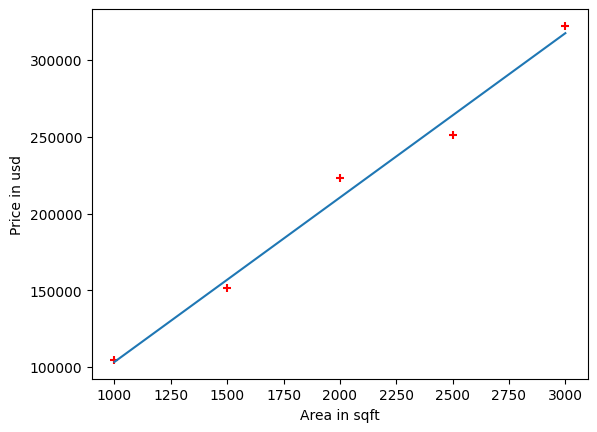

In [19]:
plt.xlabel("Area in sqft")
plt.ylabel("Price in usd")
plt.scatter(df.area,df.price,color="Red",marker="+")
plt.plot(df.area,reg.predict(df[['area']]))

In [20]:
import pickle

In [21]:
with open('model_pickle','wb') as file:
    pickle.dump(reg,file)

In [22]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [23]:
mp.coef_

array([107.054])

In [24]:
mp.intercept_

-3681.999999999971

In [25]:
mp.predict([[5000]])

C:\Users\VM40User2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([531588.])

In [27]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip


In [30]:
import joblib

In [32]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [33]:
mj = joblib.load('model_joblib')

In [34]:
mj.coef_

array([107.054])

In [35]:
mj.intercept_

-3681.999999999971

In [36]:
mj.predict([[5000]])

C:\Users\VM40User2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([531588.])